In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import benji_utils as utils
import bbbfs_algorithms as bbbfa

import networkit as nk
import pandas as pd

df = utils.df

In [2]:
import importlib
importlib.reload(bbbfa)

<module 'bbbfs_algorithms' from '/Users/benjidayan/coding/external-validity/benji/bbbfs_algorithms.py'>

In [37]:
importlib.reload(utils)
# df = utils.graph_name_to_resultsdf('130bit')
# df

<module 'benji_utils' from '/Users/benjidayan/coding/external-validity/benji/benji_utils.py'>

<AxesSubplot:>

<AxesSubplot:>

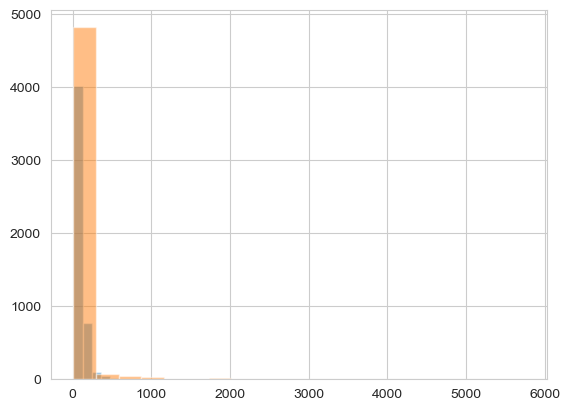

In [23]:
# df.loc[(df.algo == 'VBA') & (df.graph.str.contains('_cl')),
#        'search_space'].hist(bins=20)

# df.loc[(df.algo == 'VBA') & (~df.graph.str.contains('_cl')),
#        'search_space'].hist(bins=20)

# one blocks out the other so we can't see both. Instead:
df.loc[(df.algo == 'VBA') & (df.graph.str.contains('_cl')),
       'search_space'].hist(bins=20, alpha=0.5)
df.loc[(df.algo == 'VBA') & (~df.graph.str.contains('_cl')),
       'search_space'].hist(bins=20, alpha=0.5)

# same again but we force the two series to share the same bin widths
# df.loc[(df.algo == 'VBA') & (df.graph.str.contains('_cl')),
#        'search_space'].hist(bins=20, alpha=0.5, density=True)
# df.loc[(df.algo == 'VBA') & (~df.graph.str.contains('_cl')),
#        'search_space'].hist(bins=20, alpha=0.5, density=True)

In [215]:
# plot the same for the first 6 graphs
import numpy as np
np.random.seed(42)
graphs = np.random.choice(utils.input_names_real_with_cl, 1000)

dfs = []
for graph in graphs:
    try:
        df = utils.graph_name_to_resultsdf(graph)
        dfs.append(df)
    except FileNotFoundError:
        pass

In [216]:
df = pd.concat(dfs)
df.head()

,s,t,algo,search_space,dist,time_dist,graph
0,13,133,VBA,248,9,0.000211,DD_g699
1,23,31,VBA,70,6,0.000051,DD_g699
2,43,57,VBA,62,5,0.000046,DD_g699
3,66,119,VBA,153,7,0.000090,DD_g699
4,53,80,VBA,230,8,0.000118,DD_g699


In [218]:
graph_algo_medians = df.groupby(['graph', 'algo']).search_space.median()
graph_algo_medians = graph_algo_medians.reset_index()
graph_algo_medians = pd.merge(graph_algo_medians, utils.df_stats.loc[:, ['graph', 'm']], on='graph', how='left')
# transfer .m from graph X to graph X_cl
graph_algo_medians.loc[graph_algo_medians.graph.str.contains('_cl'), 'm'] = graph_algo_medians.loc[~graph_algo_medians.graph.str.contains('_cl'), 'm'].values

In [219]:
graph_algo_medians['search_space_fraction'] = graph_algo_medians['search_space'] / graph_algo_medians['m']

In [220]:
graph_algo_medians.head(20)

,graph,algo,search_space,m,search_space_fraction
0,145bit,EBA,23.0,11251.0,0.002044
1,145bit,VBA,25.0,11251.0,0.002222
2,145bit,VBDE,25.0,11251.0,0.002222
3,145bit,VBSQ,1642.0,11251.0,0.145943
4,145bit_cl,EBA,20.0,11251.0,0.001778
5,145bit_cl,VBA,22.0,11251.0,0.001955
6,145bit_cl,VBDE,22.0,11251.0,0.001955
7,145bit_cl,VBSQ,1974.0,11251.0,0.175451
8,176bit,EBA,27.0,82204.0,0.000328
9,176bit,VBA,23.0,82204.0,0.000280


<AxesSubplot:>

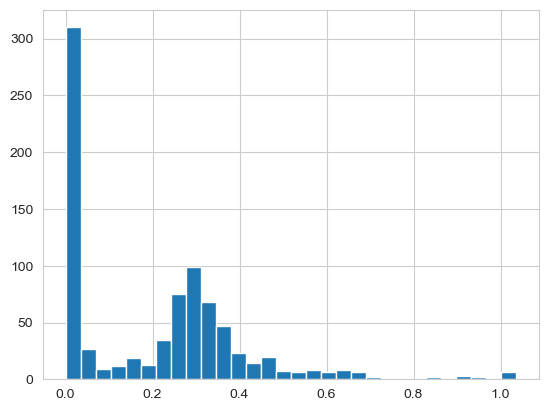

In [221]:
foo = graph_algo_medians
foo = foo.loc[~foo.graph.str.contains('_cl')]
foo.loc[foo.algo == 'EBA'].search_space_fraction.hist(bins=30)

In [222]:
foo.algo.unique()

array(['EBA', 'VBA', 'VBDE', 'VBSQ'], dtype=object)

In [223]:
foo_by_algos = {algo: foo.loc[foo.algo == algo] for algo in foo.algo.unique()}
foo_by_algos
ssf_by_algos = {algo: foo_by_algos[algo].search_space_fraction.reset_index(drop=True) for algo in foo.algo.unique()}

{'EBA':                    graph algo  search_space         m  search_space_fraction
 0                 145bit  EBA          23.0   11251.0               0.002044
 8                 176bit  EBA          27.0   82204.0               0.000328
 16                192bit  EBA          30.0  154235.0               0.000195
 24                208bit  EBA          26.0  299684.0               0.000087
 32        3D_28984_Tetra  EBA       12156.0  288684.0               0.042108
 ...                  ...  ...           ...       ...                    ...
 6592             utm3060  EBA        9885.5   28880.0               0.342296
 6600            vibrobox  EBA        1990.0  165250.0               0.012042
 6608  web-indochina-2004  EBA        1535.5   47606.0               0.032254
 6616  web-spam-detection  EBA          74.0  464959.0               0.000159
 6624          webkb-wisc  EBA          14.0     450.0               0.031111
 
 [829 rows x 5 columns],
 'VBA':                    gra

In [281]:
idx_by_size = ssf_by_algos['VBA'].argsort()
# ssf_by_algos['VBDE'] - ssf_by_algos['VBA']
med_vbsq_minus_vba = ssf_by_algos['VBSQ'][idx_by_size] - ssf_by_algos['VBA'][idx_by_size]
x = foo_by_algos['VBA'].reset_index(drop=True).m[idx_by_size]


Text(0.5, 0, 'm')

Text(0, 0.5, 'VBSQ - VBA on real graphs')

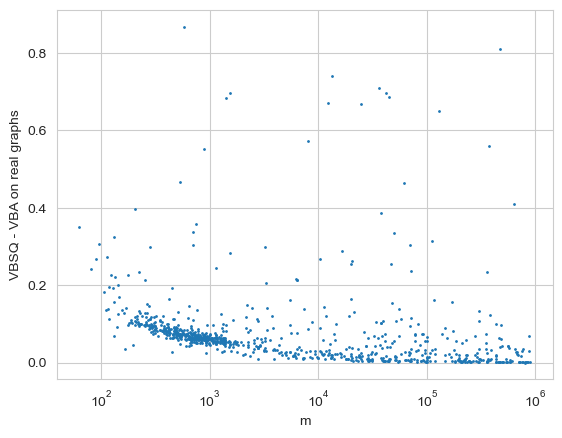

In [282]:
plt.scatter(x, med_vbsq_minus_vba, s=1)
plt.xscale('log')
plt.xlabel('m')
plt.ylabel('VBSQ - VBA on real graphs')

In [285]:
# plt.scatter(x[y < 0.4], y[y<0.4], s=1)
# plt.xscale('log')
# plt.xlabel('m')
# plt.ylabel('VBSQ - VBA on real graphs: only points with difference < 0.4')

Text(0.5, 0, 'm')

Text(0, 0.5, 'VBSQ on real graphs')

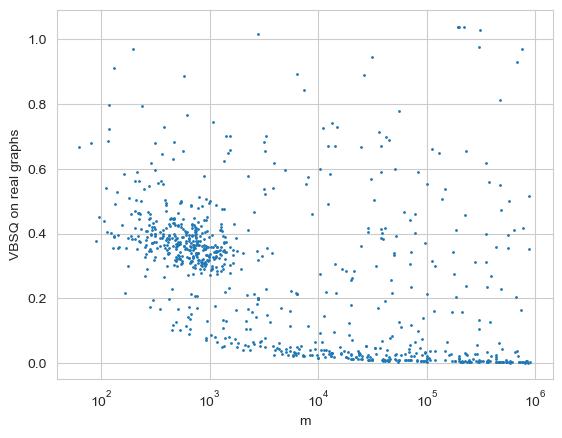

In [280]:
med_vbsq = ssf_by_algos['VBSQ'][idx_by_size]
plt.scatter(x, med_vbsq, s=1)
plt.xscale('log')
plt.xlabel('m')
plt.ylabel('VBSQ on real graphs')

In [323]:
perc = np.percentile(med_vbsq_minus_vba / med_vbsq, np.linspace(0, 100, 100))
arr = med_vbsq_minus_vba / med_vbsq
np.percentile(arr, 20)
np.percentile(arr, 80)
np.percentile(arr, [20, 80])

0.16666666666666663

0.7343772715000731

array([0.16666667, 0.73437727])

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'search space fraction')

<AxesSubplot:>

Text(0, 0.5, 'percentile')

Text(0.5, 1.0, 'VBSQ - VBA / VBSQ on real graphs')

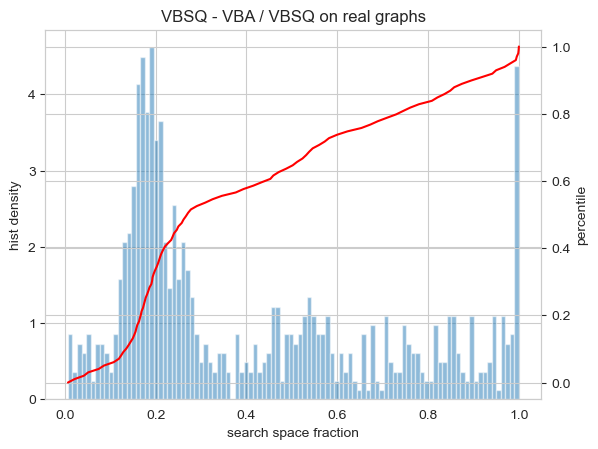

In [328]:
# hist and percentile plot of med_vbsq_minus_vba / med_vbsq all on the same axis
import matplotlib.pyplot as plt
plt.figure()
_ = plt.hist(med_vbsq_minus_vba / med_vbsq, bins=100, alpha=0.5, density=True)
_ = plt.ylabel('hist density')
plt.xlabel('search space fraction')
# plt.scatter([0.5, 0.5], [0, 1], color='red')
search_fraction_for_perc = np.percentile(med_vbsq_minus_vba / med_vbsq, np.linspace(0, 100, 100))
# plot this on the same plot but with a different scale

plt.twinx()
_ = plt.plot(search_fraction_for_perc, np.linspace(0, 1, 100), color='red')

# plt.plot(4*np.percentile(med_vbsq_minus_vba / med_vbsq, np.linspace(0, 100, 100)))
plt.ylabel('percentile')
plt.title('VBSQ - VBA / VBSQ on real graphs')
plt.show()

(array([ 16.,  17.,  17.,  41.,  96., 109.,  67.,  56.,  23.,  15.,  11.,
         14.,  13.,  24.,  20.,  27.,  26.,  19.,  13.,  10.,  12.,  17.,
         18.,  13.,  16.,  24.,  15.,  10.,  18.,  52.]),
 array([0.00680498, 0.03991052, 0.07301606, 0.10612161, 0.13922715,
        0.17233269, 0.20543823, 0.23854377, 0.27164932, 0.30475486,
        0.3378604 , 0.37096594, 0.40407148, 0.43717702, 0.47028257,
        0.50338811, 0.53649365, 0.56959919, 0.60270473, 0.63581027,
        0.66891582, 0.70202136, 0.7351269 , 0.76823244, 0.80133798,
        0.83444353, 0.86754907, 0.90065461, 0.93376015, 0.96686569,
        0.99997123]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'VBSQ - VBA / VBSQ on real graphs')

Text(0.5, 0, 'search space fraction')

Text(0, 0.5, 'count (actually only 1000 graphs)')

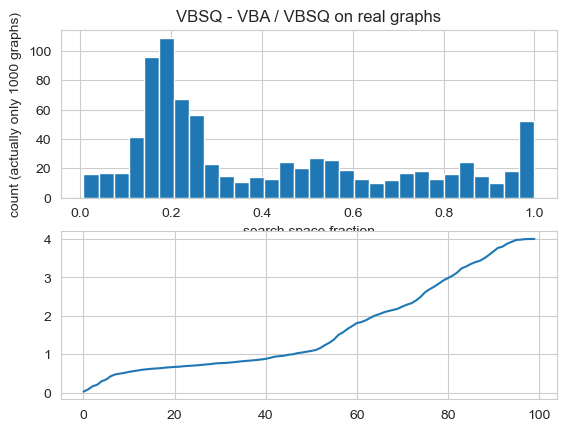

In [306]:
fig, ax = plt.subplots(2)
ax[0].hist(med_vbsq_minus_vba / med_vbsq, bins=30)
ax[0].set_title('VBSQ - VBA / VBSQ on real graphs')
ax[0].set_xlabel('search space fraction')
ax[0].set_ylabel('count (actually only 1000 graphs)')
# do a percentile plot
ax[1].plot(4*np.percentile(med_vbsq_minus_vba / med_vbsq, np.linspace(0, 100, 100)))

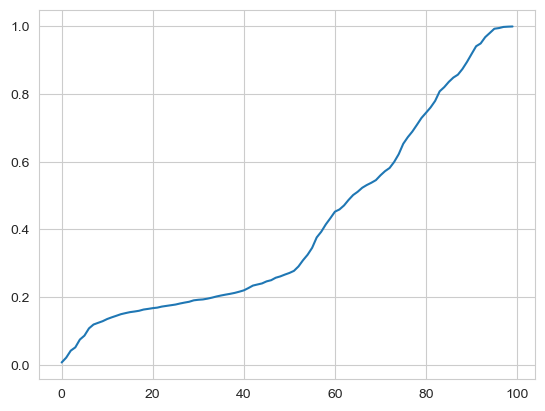

In [292]:
# do a percentile plot
plt.plot(np.percentile(med_vbsq_minus_vba / med_vbsq, np.linspace(0, 100, 100)))

## Median runtime against deviation

In [273]:
graph_algo_medians

,graph,algo,search_space,m,search_space_fraction
0,145bit,EBA,23.0,11251.0,0.002044
1,145bit,VBA,25.0,11251.0,0.002222
2,145bit,VBDE,25.0,11251.0,0.002222
3,145bit,VBSQ,1642.0,11251.0,0.145943
4,145bit_cl,EBA,20.0,11251.0,0.001778
...,...,...,...,...,...
6627,webkb-wisc,VBSQ,103.0,450.0,0.228889
6628,webkb-wisc_cl,EBA,22.0,450.0,0.048889
6629,webkb-wisc_cl,VBA,21.0,450.0,0.046667
6630,webkb-wisc_cl,VBDE,24.0,450.0,0.053333


In [274]:
a = graph_algo_medians.loc[~graph_algo_medians.graph.str.contains('_cl')]
b = graph_algo_medians.loc[graph_algo_medians.graph.str.contains('_cl')]
a = a.reset_index(drop=True)
b = b.reset_index(drop=True)
c = a.loc[a.algo == 'VBA'].search_space_fraction - b.loc[b.algo == 'VBA'].search_space_fraction
d = a.loc[a.algo == 'VBA'].m

Text(0.5, 0, 'm')

Text(0, 0.5, 'search space fraction difference - VBA real - VBA CL counterpart')

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'percentile')

Text(0, 0.5, 'search space fraction difference - VBA real - VBA CL counterpart')

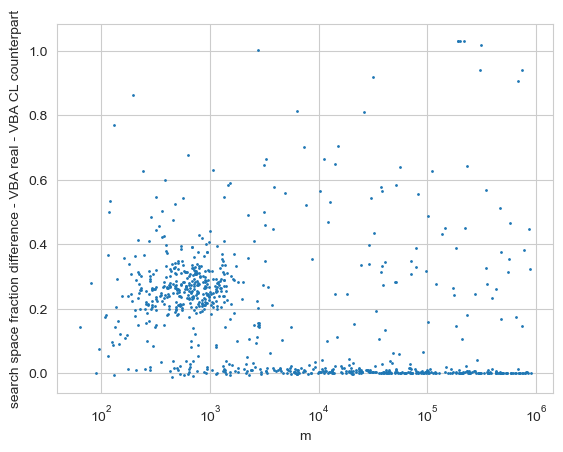

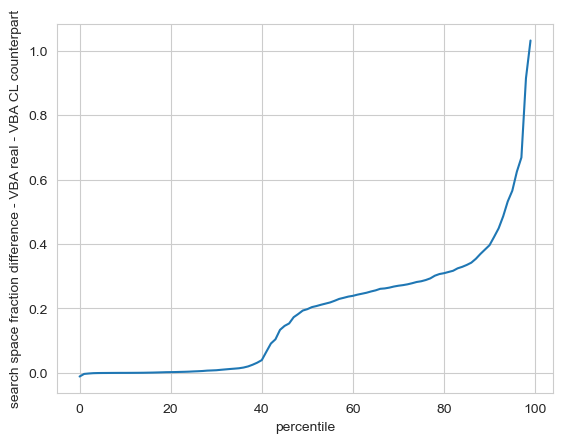

In [275]:
plt.scatter(d, c, s=1)
# plt.scatter(rand_jitter(d), c)
plt.xlabel('m')
plt.ylabel('search space fraction difference - VBA real - VBA CL counterpart')
plt.xscale('log')

plt.figure()

# c percentile plot
plt.plot(np.percentile(c, np.linspace(0, 100, 100)))
plt.xlabel('percentile')
plt.ylabel('search space fraction difference - VBA real - VBA CL counterpart')

In [276]:
c2, y2 = c.reset_index(), y.reset_index()

(-0.1, 1.0)

Text(0.5, 0, 'search space fraction difference - VBA real - VBA CL counterpart')

Text(0, 0.5, 'VBSQ - VBA on real graphs')

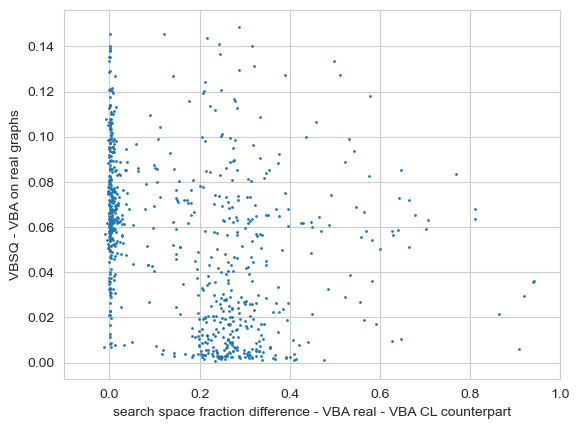

In [278]:
plt.scatter(c2[y2<0.15], y2[y2<0.15], s=1)
plt.xlim(-0.1, 1)
plt.xlabel('search space fraction difference - VBA real - VBA CL counterpart')
plt.ylabel('VBSQ - VBA on real graphs')

In [266]:
(y2<0.1).sum()

index                      1
search_space_fraction    721
dtype: int64

(array([316.,  24.,  12.,  16.,  23.,  27.,  65.,  91.,  78.,  62.,  24.,
         17.,  11.,  11.,   6.,   7.,   9.,   4.,   7.,   3.,   2.,   0.,
          1.,   2.,   0.,   1.,   2.,   2.,   0.,   6.]),
 array([-0.01111111,  0.02364294,  0.05839699,  0.09315103,  0.12790508,
         0.16265913,  0.19741318,  0.23216723,  0.26692128,  0.30167533,
         0.33642938,  0.37118342,  0.40593747,  0.44069152,  0.47544557,
         0.51019962,  0.54495367,  0.57970772,  0.61446176,  0.64921581,
         0.68396986,  0.71872391,  0.75347796,  0.78823201,  0.82298606,
         0.8577401 ,  0.89249415,  0.9272482 ,  0.96200225,  0.9967563 ,
         1.03151035]),
 <BarContainer object of 30 artists>)

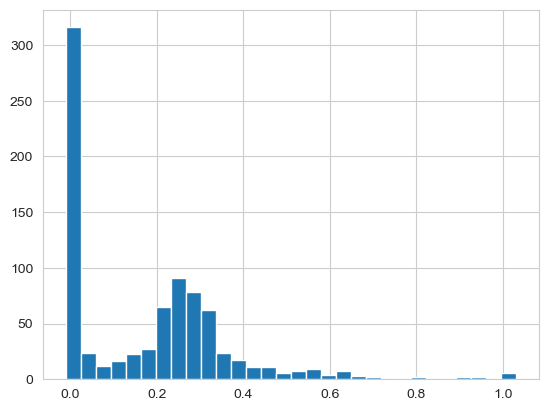

In [247]:
plt.hist(c, bins=30)

(array([727.,  50.,  18.,  11.,   3.,   5.,   3.,   1.,   0.,   1.,   1.,
          0.,   3.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.10446324, 0.20892648, 0.31338972, 0.41785296,
        0.52231619, 0.62677943, 0.73124267, 0.83570591, 0.94016915,
        1.04463239, 1.14909563, 1.25355887, 1.35802211, 1.46248534,
        1.56694858, 1.67141182, 1.77587506, 1.8803383 , 1.98480154,
        2.08926478, 2.19372802, 2.29819126, 2.40265449, 2.50711773,
        2.61158097, 2.71604421, 2.82050745, 2.92497069, 3.02943393,
        3.13389717]),
 <BarContainer object of 30 artists>)

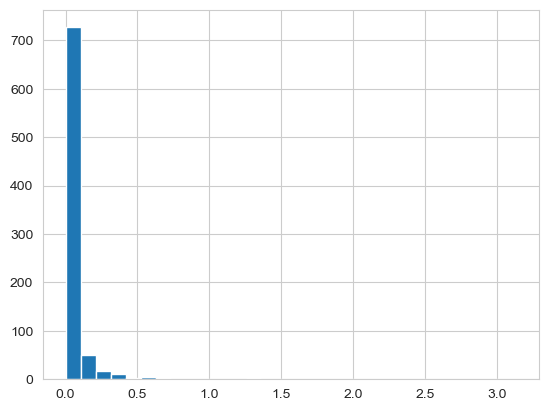

In [248]:
plt.hist(y, bins=30)

In [185]:
a.loc[a.algo == 'VBA'].search_space_fraction

1       0.001955
5       0.001498
9       0.013619
13      0.008439
17      0.022246
          ...   
1097    0.000199
1101    0.008015
1105    0.000183
1109    0.003084
1113    0.001173
Name: search_space_fraction, Length: 279, dtype: float64

In [186]:
b.loc[b.algo == 'VBA'].search_space_fraction

1       0.002222
5       0.001475
9       0.005837
13      0.321378
17      0.305085
          ...   
1097    0.000028
1101    0.013255
1105    0.002174
1109    0.013325
1113    0.919441
Name: search_space_fraction, Length: 279, dtype: float64

<AxesSubplot:>

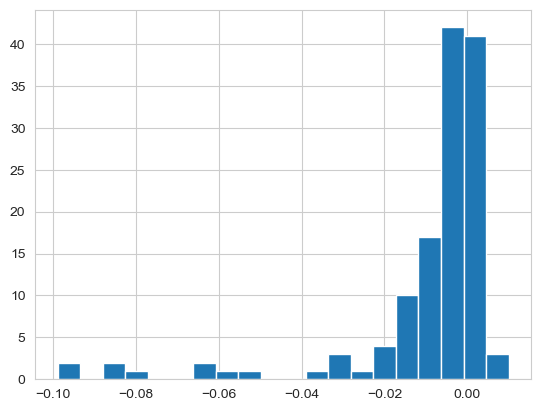

In [179]:
c.loc[c > -0.1].hist(bins=20)

In [240]:
y.shape

(829,)

In [242]:
c.shape

(829,)

In [125]:
import numpy as np
np.percentile(c, 90)

29.100000000000016

<AxesSubplot:>

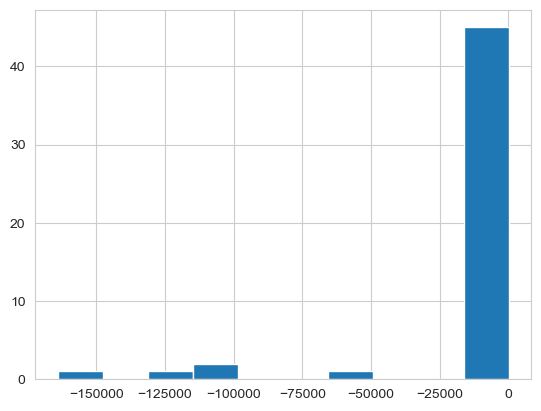

In [122]:
c.hist(bins)

## GIRGs investigation

In [107]:
utils.input_names_girg

['girg_n=50000_deg=10_dim=2_ple=2.1_T=0.0_seed=321',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.0_seed=321_square',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.0_seed=356',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.0_seed=356_square',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.0_seed=489',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.0_seed=489_square',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.0_seed=64',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.0_seed=64_square',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.0_seed=836',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.0_seed=836_square',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.4_seed=321',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.4_seed=321_square',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.4_seed=356',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.4_seed=356_square',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.4_seed=489',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.4_seed=489_square',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.4_seed=64',
 'girg_n=50000_deg=10_dim=2_ple=2.1_T=0.4_seed

## Multi hist plots

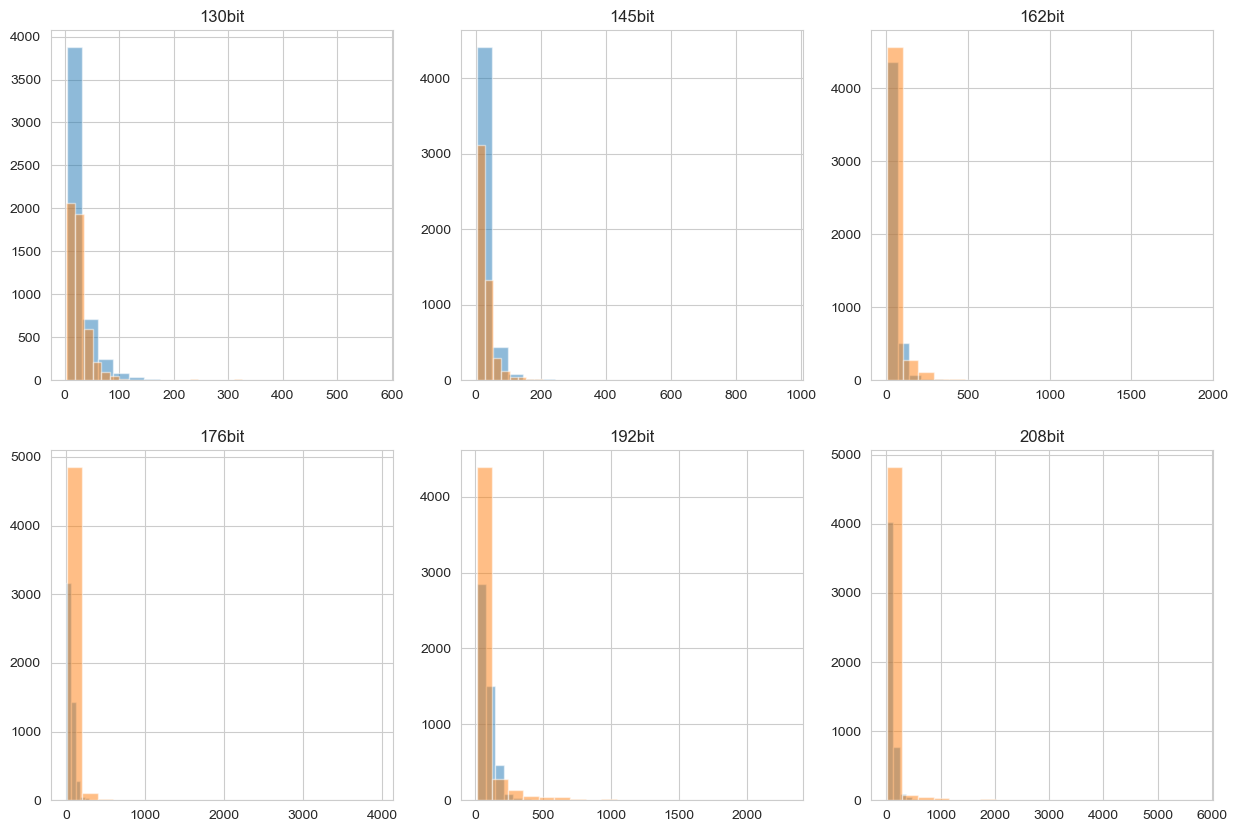

In [21]:
# plot the same for the first 6 graphs
graphs = utils.input_names_real_with_cl[:50]

dfs = []
for graph in graphs:
    df = utils.graph_name_to_resultsdf(graph)
    dfs.append(df)

import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, df in enumerate(dfs):
    _ = ax = axs[i // 3, i % 3]
    _ = df.loc[(df.algo == 'VBA') & (df.graph.str.contains('_cl')),
           'search_space'].hist(bins=20, ax=ax, alpha=0.5)
    _ = df.loc[(df.algo == 'VBA') & (~df.graph.str.contains('_cl')),
        'search_space'].hist(bins=20, ax=ax, alpha=0.5)
    _ = ax.set_title(graphs[i])

In [4]:
import glob
csvs = glob.glob(utils.p + 'real_fake_output/*')
import tqdm
dfs = []
for csv in tqdm.tqdm(csvs):
    df = pd.read_csv(csv)
    dfs.append(df)


100%|██████████| 2705/2705 [01:11<00:00, 38.08it/s]


In [5]:
df = pd.concat(dfs)

In [9]:
df.loc[df.graph == 'DD_g488'].shape

(40000, 7)

In [10]:
40000/4

10000.0

In [12]:
x = df.loc[df.graph == 'DD_g488'].algo

In [13]:
x.iloc[4999:5001]

4999    python-BiBFS_VertexBalancedApproximate
5000    python-BiBFS_VertexBalancedApproximate
Name: algo, dtype: object

In [14]:
x.iloc[9999:10001]

9999     python-BiBFS_VertexBalancedApproximate
10000      python-BiBFS_ExactExpandSmallerQueue
Name: algo, dtype: object

In [18]:
fn = f'{utils.p}real_fake_output/130bit.csv'
foo = pd.read_csv(fn)

In [24]:
foo.columns

Index(['s', 't', 'algo', 'search_space', 'dist', 'time_dist', 'graph'], dtype='object')

In [15]:
utils.input_names_real_with_cl[:10]

['130bit',
 '145bit',
 '162bit',
 '176bit',
 '192bit',
 '208bit',
 '2D_27628_bjtcai',
 '2D_54019_highK',
 '2cubes_sphere',
 '3D_28984_Tetra']